In [1]:
import PIL
from PIL import Image

import numpy as np
import os 
from matplotlib import pyplot as plot

Width and height: 2832,4256
Original Image size: 36158976


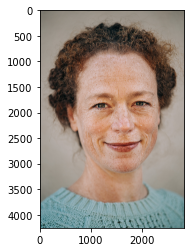

In [2]:
# 1. Read in the image using the PIL library, store the width and height of the image in a
# variable and compute the size of the original image as w*h*3
img = Image.open('Portrait.jpg')
w,h = img.size
print(f'Width and height: {w},{h}')
size = h * w * 3
print(f'Original Image size: {size}')
plot.imshow(img)

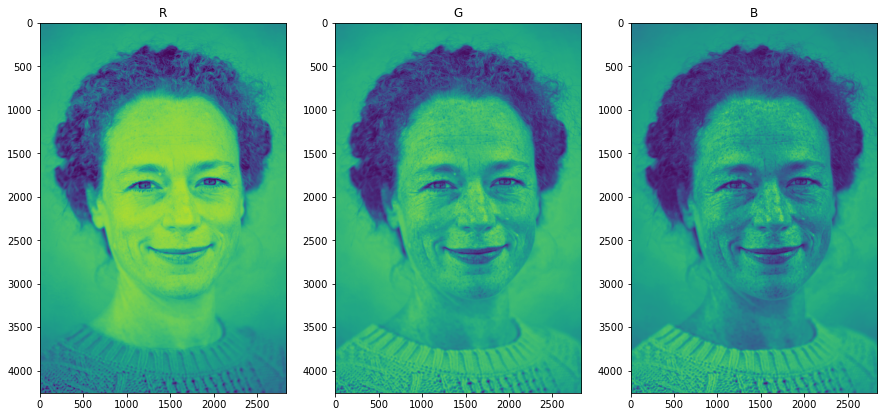

In [3]:
# 2. and 3. Converted to numpy array and split
img = np.array(img)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

# Used to display images
fig, ax = plot.subplots(1,3,figsize=(15,10))
ax[0].imshow(R)
ax[0].title.set_text('R')
ax[1].imshow(G)
ax[1].title.set_text('G')
ax[2].imshow(B)
ax[2].title.set_text('B')

In [4]:
# 5. SVD decomposition for all channels
ur, sr, vr = np.linalg.svd(R,full_matrices=False)
ug, sg, vg = np.linalg.svd(G,full_matrices=False)
ub, sb, vb = np.linalg.svd(B,full_matrices=False)

#diagnolize
srd = np.diag(sr)
sbd = np.diag(sb)
sgd = np.diag(sg)

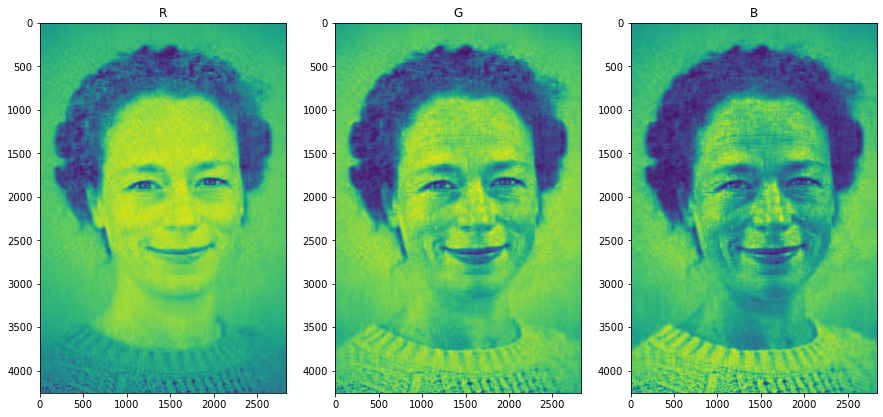

In [5]:
# Compression
k = 40

temp_r = np.dot(np.dot(ur[:,0:k],srd[0:k,0:k]),vr[0:k,:])
temp_g = np.dot(np.dot(ug[:,0:k],sgd[0:k,0:k]),vg[0:k,:])
temp_b = np.dot(np.dot(ub[:,0:k],sbd[0:k,0:k]),vb[0:k,:])
# Used to display images
fig2, ax2 = plot.subplots(1,3,figsize=(15,10))
ax2[0].imshow(temp_r)
ax2[0].title.set_text('R')
ax2[1].imshow(temp_g)
ax2[1].title.set_text('G')
ax2[2].imshow(temp_b)
ax2[2].title.set_text('B')

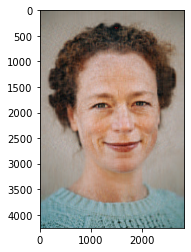

In [6]:
# 7. Recombine image
ir = Image.fromarray(np.uint8(temp_r))
ig = Image.fromarray(np.uint8(temp_g))
ib = Image.fromarray(np.uint8(temp_b))
img_compressed = Image.merge('RGB',(ir,ig,ib))
plot.imshow(img_compressed)


In [7]:
# Solve for compression and print percentage compressed (Original - Compressed)/Original * 100%
compressed_size = k * (w + 1 + h)
print(f'Original Size:{size}\nCompressed Size: {compressed_size}\nPercentage Compressed: {((size - compressed_size) / size * 100)}%')



Original Size:36158976
Compressed Size: 283560
Percentage Compressed: 99.21579637653456%
